In [2]:
## Set-up.
### Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = '../dataset/'


In [4]:
data = pd.read_parquet(os.path.join(DATA_PATH,'eda.gzip'))

In [11]:
data.head()

,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,unemployment_reason,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,79,Female,High school graduate,None,None,Widowed,White,All other,Not in labor force,None,...,US,?,?,?,?,None,None,None,1779.74,Below limit
1,65,Female,High school graduate,None,None,Widowed,White,All other,Children or Armed Forces,None,...,US,unchanged,None,unchanged,unchanged,Same,None,None,2366.75,Below limit
2,21,Male,12th grade no diploma,Federal government,None,Never married,Black,All other,Children or Armed Forces,None,...,US,unchanged,None,unchanged,unchanged,Same,None,None,1693.42,Below limit
3,2,Female,Children,None,None,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,None,...,India,unchanged,None,unchanged,unchanged,Same,None,None,1380.27,Below limit
4,70,Male,High school graduate,None,None,Married-civilian spouse present,White,All other,Not in labor force,None,...,US,?,?,?,?,None,None,None,1580.79,Below limit


In [5]:
def nan_ratio(df):
    cont = []
    for i in df.columns:
        cont.append([i,np.average(df[i].isna())*100])
    res = pd.DataFrame({'variable':[x[0] for x in cont if x[1]!=0], 'nan_ratio': [x[1] for x in cont if x[1]!=0]})
    return res
        

In [6]:
nan_ratio(data)

,variable,nan_ratio
0,class,50.236517
1,education_institute,93.650566
2,unemployment_reason,96.887813
3,is_labor_union,90.415706
4,occupation_code_main,50.450837
5,under_18_family,72.388890
6,veterans_admin_questionnaire,99.005246
7,migration_code_change_in_msa,0.757999
8,migration_prev_sunbelt,42.220727
9,migration_code_move_within_reg,0.757999


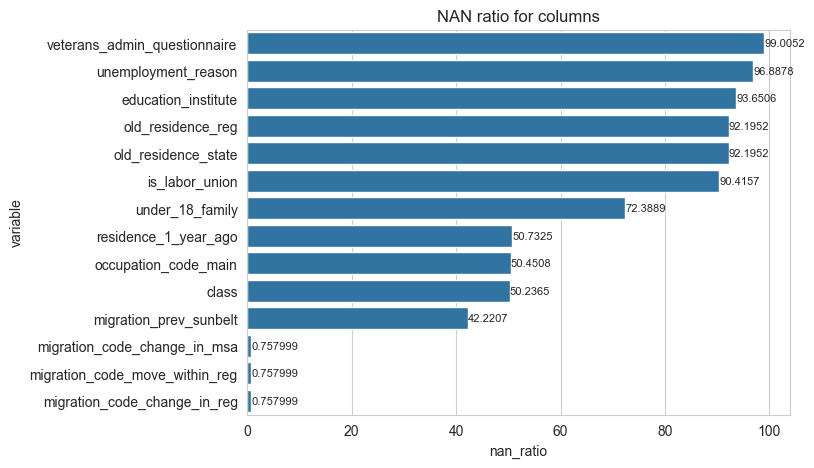

In [7]:
df_nan = nan_ratio(data).sort_values('nan_ratio', ascending = False)
f, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.barplot(df_nan, y='variable', x='nan_ratio', orient='h',ax = ax)
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('NAN ratio for columns')
plt.show()

In [8]:
column_to_drop = df_nan.loc[df_nan.nan_ratio>40,].variable.values

In [9]:
data_wo_nan = data.drop(column_to_drop, axis=1)

In [18]:
data_wo_nan

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,migration_code_change_in_msa,migration_code_move_within_reg,migration_code_change_in_reg,importance_of_record,income_above_limit
0,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,...,Native,95,US,US,US,?,?,?,1779.74,Below limit
1,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,...,Native,94,US,US,US,unchanged,unchanged,unchanged,2366.75,Below limit
2,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,...,Native,94,US,US,US,unchanged,unchanged,unchanged,1693.42,Below limit
3,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,...,Native,94,US,India,India,unchanged,unchanged,unchanged,1380.27,Below limit
4,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,Native,95,US,US,US,?,?,?,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,16,Female,7th and 8th grade,Never married,White,All other,Not in labor force,0,0,0,...,Native,95,US,US,US,?,?,?,2170.60,Below limit
209495,78,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,Native,95,US,US,Canada,?,?,?,1029.57,Below limit
209496,8,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,...,Native,95,US,US,US,?,?,?,791.61,Below limit
209497,26,Female,Some college but no degree,Married-civilian spouse present,White,All other,Children or Armed Forces,0,700,52,...,Native,94,US,US,US,unchanged,unchanged,unchanged,3530.26,Below limit


In [19]:
def qmark_ratio(df):
    cont = []
    for i in df.columns:
        cont.append([i,np.average(df[i]==' ?')*100])
    res = pd.DataFrame({'variable':[x[0] for x in cont if x[1]!=0], 'qmark_ratio': [x[1] for x in cont if x[1]!=0]})
    return res

In [20]:
qmark_ratio(data_wo_nan)

,variable,qmark_ratio
0,country_of_birth_own,1.750366
1,country_of_birth_father,3.427701
2,country_of_birth_mother,3.110277
3,migration_code_change_in_msa,49.974463
4,migration_code_move_within_reg,49.974463
5,migration_code_change_in_reg,49.974463


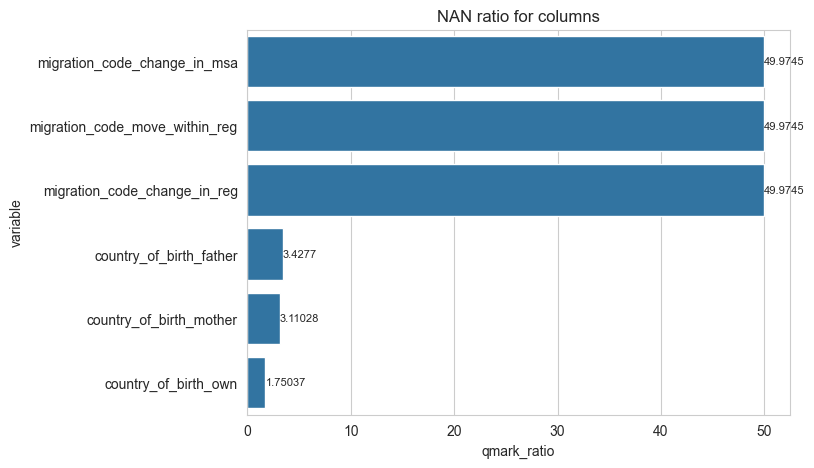

In [22]:
df_qmark = qmark_ratio(data_wo_nan).sort_values('qmark_ratio', ascending = False)
f, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.barplot(df_qmark, y='variable', x='qmark_ratio', orient='h',ax = ax)
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('NAN ratio for columns')
plt.show()

In [23]:
column_to_drop = df_qmark.loc[df_qmark.qmark_ratio>40,].variable.values

In [24]:
data_wo_nan_qm = data_wo_nan.drop(column_to_drop, axis=1)

In [25]:
data_wo_nan_qm

,age,gender,education,marital_status,race,is_hispanic,employment_commitment,employment_stat,wage_per_hour,working_week_per_year,...,gains,losses,stocks_status,citizenship,mig_year,country_of_birth_own,country_of_birth_father,country_of_birth_mother,importance_of_record,income_above_limit
0,79,Female,High school graduate,Widowed,White,All other,Not in labor force,0,0,52,...,0,0,292,Native,95,US,US,US,1779.74,Below limit
1,65,Female,High school graduate,Widowed,White,All other,Children or Armed Forces,0,0,0,...,0,0,0,Native,94,US,US,US,2366.75,Below limit
2,21,Male,12th grade no diploma,Never married,Black,All other,Children or Armed Forces,0,500,15,...,0,0,0,Native,94,US,US,US,1693.42,Below limit
3,2,Female,Children,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,0,0,0,...,0,0,0,Native,94,US,India,India,1380.27,Below limit
4,70,Male,High school graduate,Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,0,0,0,Native,95,US,US,US,1580.79,Below limit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209494,16,Female,7th and 8th grade,Never married,White,All other,Not in labor force,0,0,0,...,0,0,0,Native,95,US,US,US,2170.60,Below limit
209495,78,Male,Bachelors degree(BA AB BS),Married-civilian spouse present,White,All other,Not in labor force,0,0,0,...,0,0,71,Native,95,US,US,Canada,1029.57,Below limit
209496,8,Female,Children,Never married,White,All other,Children or Armed Forces,0,0,0,...,0,0,0,Native,95,US,US,US,791.61,Below limit
209497,26,Female,Some college but no degree,Married-civilian spouse present,White,All other,Children or Armed Forces,0,700,52,...,0,0,0,Native,94,US,US,US,3530.26,Below limit


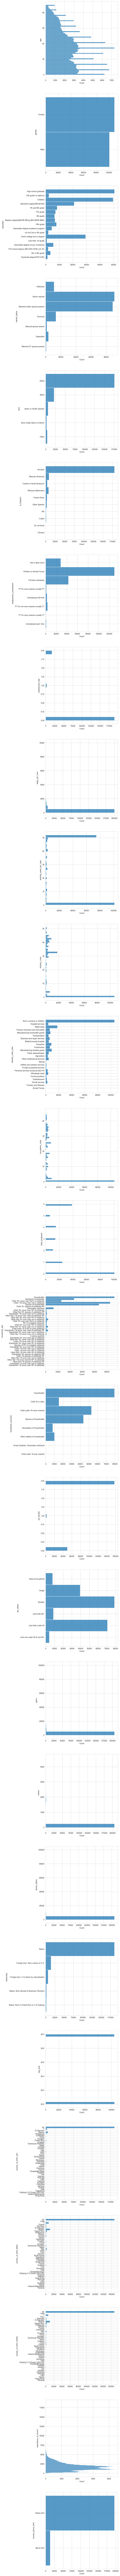

In [48]:
f, ax = plt.subplots(28, 1, figsize=(7, 250))
for i in range(len(data_wo_nan_qm.columns)):
    sns.histplot(data_wo_nan_qm, y=data_wo_nan_qm.columns[i], ax=ax[i])
#data_wo_nan_qm.education.barplot(orientation='horizontal')

In [26]:
data_clean = data_wo_nan_qm

In [27]:
data_clean.to_parquet(os.path.join(DATA_PATH,'preprocessing.gzip'))